# **Задача "Кешбек и кубики"**
### В данном ноутбуке представлено решение тестового задания на позицию "Data Scientist".
>### **Текст задания:**
* **Часть 1:** Почта-Банк запустил игровую программу лояльности "Шанс". Её описание доступно по ссылке: https://www.pochtabank.ru/news/676316.
Какая сумма чисел на двух кубиках является наиболее выигрышной и почему?
* **Часть 2:** Какая сумма чисел будет наиболее выигрышной, если кубиков будет три и, соответственно, вариативность будет от 3 до 18.
* **Пояснение:** Чтобы получить кэшбэк, необходимо выбрать одну или несколько совершенных операций, указать желаемый кэшбэк от 2% до 12% и бросить кубики. Если выбранное и выпавшее на кубиках числа совпали, указанный кэшбэк будет зачислен на счет. *(То есть игра сводится к угадыванию суммы значений двух игральных костей.)*



# **Часть 1: Решение**.

>Для определения наиболее выигрышной суммы чисел давайте построим всё вероятностное пространство для данной случайной величины, оно будет включать в себя все возможные комбинации подбрасываний двух игральных кубиков. Далее подсчитаем, частоты для выпадающих значений.

> *Отдельно импортируем необходимые библиотеки для работы с данными.*

In [2]:
import random
random. seed(6)

import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.table import Table

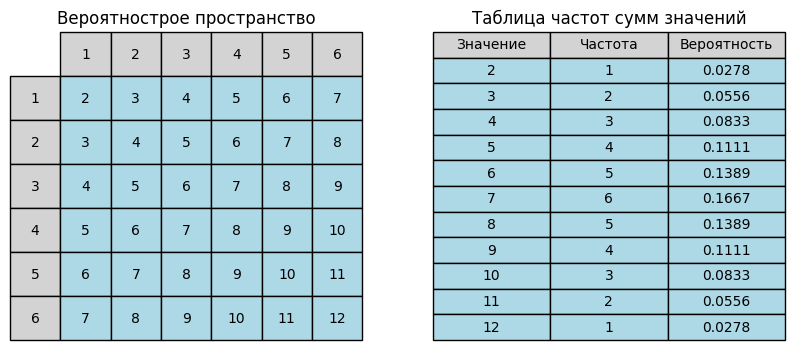

In [3]:
columns = list(range(1, 7))
df_space = pd.DataFrame(columns=columns)
for i in range(1, 7):
    df_space.loc[i] = [i + j for j in columns]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].axis("off")
table = Table(axes[0], bbox=[0, 0, 1, 1])

for i, row in enumerate(df_space.values):
    for j, cell in enumerate(row):
        table.add_cell(i + 1, j + 1, text=str(cell), loc="center", facecolor="lightblue", width=0.1, height=0.1)
for j, column in enumerate(df_space.columns):
    table.add_cell(0, j + 1, text=column, loc="center", facecolor="lightgray", width=0.1, height=0.1)
for i, row in enumerate(df_space.index):
    table.add_cell(i + 1, 0, text=row, loc="center", facecolor="lightgray", width=0.1, height=0.1)

axes[0].add_table(table)
axes[0].set_title("Вероятнострое пространство")

# Считаем частоты
frequencies = {}
for column in df_space.columns:
  for value in df_space[column]:
    if f"{value}" in frequencies:
      frequencies[f"{value}"] += 1
    else:
      frequencies[f"{value}"] = 1

total_count = sum(frequencies.values())
table_data = []
for value, count in frequencies.items():
  probability = round(count / total_count, 4)
  table_data.append([value, count, probability])
df_chances = pd.DataFrame(table_data, columns=["Значение", "Частота", "Вероятность"])

axes[1].axis("off")
table = Table(axes[1], bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(50)

for i, row in enumerate(df_chances.values):
    for j, cell in enumerate(row):
        table.add_cell(i + 1, j + 1, text=str(cell), loc="center", facecolor="lightblue", width=0.1, height=0.1)
for j, column in enumerate(df_chances.columns):
    table.add_cell(0, j + 1, text=column, loc="center", facecolor="lightgray", width=0.1, height=0.1)

axes[1].add_table(table)
axes[1].set_title("Таблица частот сумм значений")
plt.show()


### Для большей наглядности построим графики:

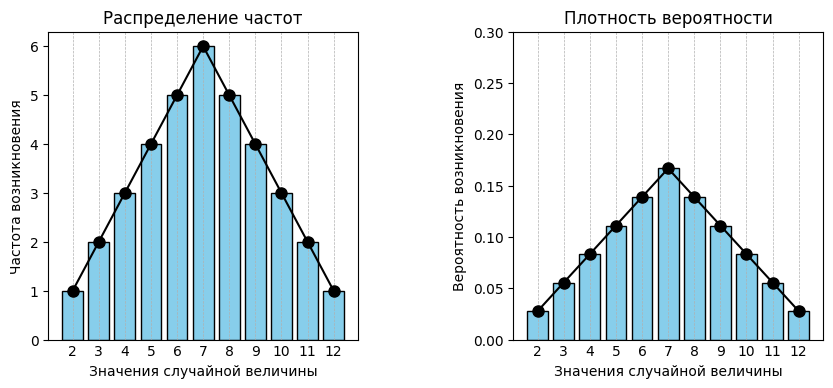

In [4]:
values = list(map(int, df_chances["Значение"]))
frequencies = list(map(int, df_chances["Частота"]))
chances = list(df_chances["Вероятность"])


# Построение гистограмм
fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace': 0.5})

axes[0].bar(values, frequencies, color='skyblue', edgecolor='black', width=0.8, align='center')
axes[0].plot(values, frequencies, 'o-', color='black', markersize=8)
axes[0].set_xlabel('Значения случайной величины')
axes[0].set_ylabel('Частота возникновения')
axes[0].set_title('Распределение частот')
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)
axes[0].set_xticks(values, values)
axes[0].tick_params(axis='x', length=0)

axes[1].bar(values, chances, color='skyblue', edgecolor='black', width=0.8, align='center')
axes[1].plot(values, chances, 'o-', color='black', markersize=8)
axes[1].set_ylim(ymin=0, ymax=0.3)
axes[1].set_xlabel('Значения случайной величины')
axes[1].set_ylabel('Вероятность возникновения')
axes[1].set_title('Плотность вероятности')
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)
axes[1].set_xticks(values, values)
axes[1].tick_params(axis='x', length=0)



plt.show()

Исходя из построенных диаграмм, заметим, что случайная величина "Сумма значений на двух игральных кубиках" подчиняется распределению Гаусса (оно же нормальное распределение). Вероятность получить в результате броска кубиков срединное значение (в нашем случае это 7) значительно выше, чем вероятность получить крайние значения (2 или 12).
> * Обладая этой информацией мы могли бы заключить, что наиболее выигрышной стратегией является всегда выбирать число 7, однако так как в рамках данной игры присутствует не только деление на победу и поражение, но и рассматривается некий выигрыш, соотносимый со значением числа при победе - необходимо скорректировать полученные данные с учетом возможных выигрышей.
* Для этого, в дальнейшем, основываясь на ряде положений из ***закона больших чисел*** мы будем рассматривать следующий частный случай: все покупки обладают одинаковой стоимостью n, число покупок велико и позвоялет нам говорить о том, что полученное распределение повторяет вероятностное распределение нашей ДСВ лишь с незначительными отклонениями.


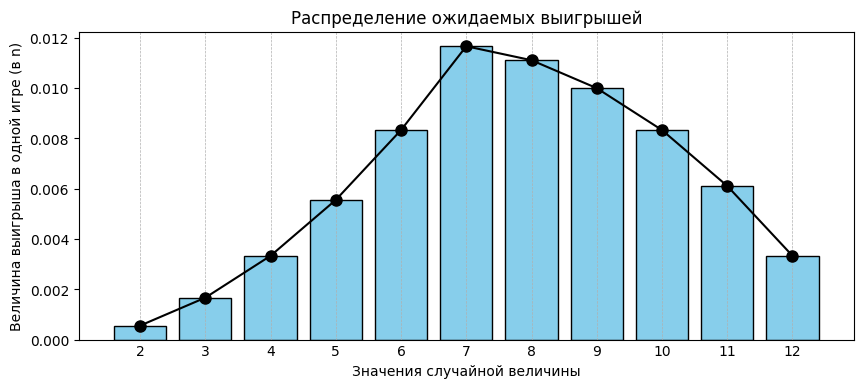

In [5]:
# Построение гистограмм
prizes = [j*i/3600 for i, j in zip(values, frequencies)]

fig, ax = plt.subplots(1, 1, figsize=(10, 4), gridspec_kw={'wspace': 0.5})

ax.bar(values, prizes, color='skyblue', edgecolor='black', width=0.8, align='center')
ax.plot(values, prizes, 'o-', color='black', markersize=8)
ax.set_xlabel('Значения случайной величины')
ax.set_ylabel('Величина выигрыша в одной игре (в n)')
ax.set_title('Распределение ожидаемых выигрышей')
ax.grid(axis='x', linestyle='--', linewidth=0.5)
ax.set_xticks(values, values)
ax.tick_params(axis='x', length=0)

### **Разберем, что нам говорит полученный график.**
> На данном графике представлена информация о размере среднего ожидаемого выигрыша для одной игры при большом количестве игр и неизменной цене покупки, каждый стобец в нем иллюстрирует отдельную стратегию вида "В каждой игре выбираю в качестве суммы на кубиках значение внизу столбца."
* С учетом полученных данных можно говорить, что, из представленных - наиболее выигрышной стратегией является всегда ожидать число 7, так как в таком случае - средний выигрыш от одной игры является максимальным.
* Дополнительно интересным фактом является и то, что в случае, если бы мы могли выбрать несколько значений, наиболее выгодно было бы начать брать значения в порядке: 7, 8, 9, 6 и 10 (значения ожидаемого выигрыша между ними равны), 11 и т.д. Что не совпадает изначальным распределением вероятности и объясняется тем, что большее значение - предполагает больший выигрыш, компенсируя увеличенным размером выигрыша разницу в частоте их возникновения.

### Дополнительно рассмотрим случай, когда игрок каждый раз выбирает сумму значений на двух кубиках случайно. Для соотнесения результатов мы сохраним правило, что все покупки совершены по цене n, а число покупок введем как 100000, что является достоточно большой величиной чтобы говорить о работе закона больших чисел.

In [24]:
summ_prize = 0

for i in range(1, 100001):
  prediction = random.randint(2,12)
  if (prediction == random.randint(1,6) + random.randint(1,6)):
    summ_prize += prediction/100

average_prize = summ_prize/100000

print(f"Суммарный выигрыш за 100000 игр составил: {summ_prize}")
print(f"Средний выигрыш на одну игру составил: {average_prize}")

Суммарный выигрыш за 100000 игр составил: 641.6300000000018
Средний выигрыш на одну игру составил: 0.006416300000000018


Исходя из проанализированного мы получаем, что в случае, когда значение выбирается случайно - средний выигрыш будет колебаться около 0.0063 или около 0.63% от суммы покупки, что почти в два раза поигрывает среднему выигрышу полученному с использованием самой оптимальной стратегии из рассмотренных выше.

## **Часть 1: Заключение**
> **Отвечая на вопрос из задания: "Какая сумма чисел на двух кубиках является наиболее выигрышной и почему?" - можем сказать, что наиболее выигрышной суммой чисел является число 7, как с точки зрения частоты достижения побед оно является наиболее вероятным результатом для двух кубиков, так и с точки зрения максимизации среднего ожидаемого выигрыша для игрока, что делает его однозначным фаворитом среди иных значений в данной игре.**
* Отдельно хочется отметить следующее: в самом удачном сценарии для игрока - средний ожидаемый выигрыш будет стремиться, при больших значениях игр, к примерно 1,17% от цены покупки n, что оставляет данное значение кешбека в промежутке от 0% до 2%, который предлагают в качестве "базового" (на все покупки) иные банковские организации на рынке. Тем самым банк не неся затрат превышающих принятые по рынку - организовал акцию для привлечения клиентского внимания и создания информационного шума, что является интересным с точки зрения маркетинга действием.

# **Часть 2: Решение**.

> Проведем аналогичное исследование для случая, когда используются три игральные кости.
* Часть теоретических выкладок будет опущена, чтобы не дублировать разделы их разбора первого случая.
* Также откажемся от визуализации вероятностного пространства в силу низкой читаемости трехмерного представления, и сразу перейдем к подсчету частот и построению графиков.


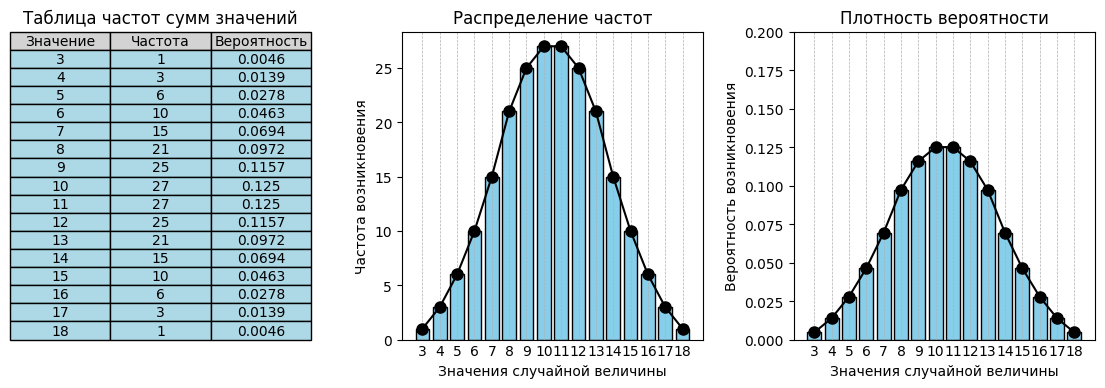

In [7]:
probability_space3 = []
frequencies3 = {}

for i, j, k in product(range(1, 7), repeat=3):
  probability_space3.append((i, j, k))
  if f"{i+j+k}" in frequencies3:
    frequencies3[f"{i+j+k}"] += 1
  else:
    frequencies3[f"{i+j+k}"] = 1

total_count3 = len(probability_space3)
table_data3 = []

for value3, count3 in frequencies3.items():
  probability3 = round(count3 / total_count3, 4)
  table_data3.append([value3, count3, probability3])
df_chances3 = pd.DataFrame(table_data3, columns=["Значение", "Частота", "Вероятность"])

fig, axes = plt.subplots(1, 3, figsize=(14, 4), gridspec_kw={'wspace': 0.3})

axes[0].axis("off")
table = Table(axes[0], bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(50)

for i, row in enumerate(df_chances3.values):
    for j, cell in enumerate(row):
        table.add_cell(i + 1, j + 1, text=str(cell), loc="center", facecolor="lightblue", width=0.1, height=0.1)
for j, column in enumerate(df_chances3.columns):
    table.add_cell(0, j + 1, text=column, loc="center", facecolor="lightgray", width=0.1, height=0.1)

axes[0].add_table(table)
axes[0].set_title("Таблица частот сумм значений")

values3 = list(map(int, df_chances3["Значение"]))
frequencies3 = list(map(int, df_chances3["Частота"]))
chances3 = list(df_chances3["Вероятность"])

axes[1].bar(values3, frequencies3, color='skyblue', edgecolor='black', width=0.8, align='center')
axes[1].plot(values3, frequencies3, 'o-', color='black', markersize=8)
axes[1].set_xlabel('Значения случайной величины')
axes[1].set_ylabel('Частота возникновения')
axes[1].set_title('Распределение частот')
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)
axes[1].set_xticks(values3, values3)
axes[1].tick_params(axis='x', length=0)

axes[2].bar(values3, chances3, color='skyblue', edgecolor='black', width=0.8, align='center')
axes[2].plot(values3, chances3, 'o-', color='black', markersize=8)
axes[2].set_ylim(ymin=0, ymax=0.2)
axes[2].set_xlabel('Значения случайной величины')
axes[2].set_ylabel('Вероятность возникновения')
axes[2].set_title('Плотность вероятности')
axes[2].grid(axis='x', linestyle='--', linewidth=0.5)
axes[2].set_xticks(values3, values3)
axes[2].tick_params(axis='x', length=0)

plt.show()


Из полученных результатов видно, что случайная величина "Сумма значений на трех игральных кубиках" также подчиняется нормальному распределению, более того, с увеличением количества бросков до 3 «колокол Гаусса» не только сохраняется, но и становиться более выраженным. Отмечу дополнительно, что и для всех последующих повышений количества бросков эта тенденция сохраняется.
* Вероятность получить в результате броска кубиков срединное значение (в нашем случае это 10 или 11 - равновероятны) значительно выше, чем вероятность получить крайние значения (2 или 18).
* Теперь, аналогично предыдущему случаю, скорректируем полученные данные с учетом возможных выигрышей.
* Для этого, будем рассматривать следующий частный случай: все покупки обладают одинаковой стоимостью n, число покупок велико и позвоялет нам говорить о том, что согласно ***закону больших чисел*** полученное распределение повторяет вероятностное распределение нашей ДСВ с незначительными отклонениями.


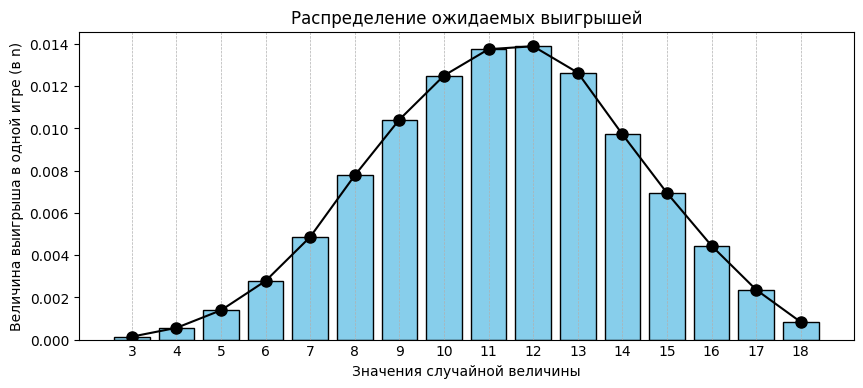

In [31]:
# Построение гистограмм
prizes3 = [j*i/(total_count3*100) for i, j in zip(values3, frequencies3)]

fig, ax = plt.subplots(1, 1, figsize=(10, 4), gridspec_kw={'wspace': 0.5})

ax.bar(values3, prizes3, color='skyblue', edgecolor='black', width=0.8, align='center')
ax.plot(values3, prizes3, 'o-', color='black', markersize=8)
ax.set_xlabel('Значения случайной величины')
ax.set_ylabel('Величина выигрыша в одной игре (в n)')
ax.set_title('Распределение ожидаемых выигрышей')
ax.grid(axis='x', linestyle='--', linewidth=0.5)
ax.set_xticks(values3, values3)
ax.tick_params(axis='x', length=0)

### **Разберем, что нам говорит полученный график.**
> На данном графике представлена информация о размере среднего ожидаемого выигрыша для одной игры при большом количестве игр и неизменной цене покупки, каждый стобец в нем иллюстрирует отдельную стратегию вида "В каждой игре выбираю в качестве суммы на кубиках значение внизу столбца."
* С учетом полученных данных можно говорить, что, из представленных - наиболее выигрышной стратегией является всегда ожидать число 12, так как в таком случае - средний выигрыш от одной игры является максимальным. Что можно назвать довольно интересным Так как 12 не является серединой распределения вероятности для суммы трех кубиков и соответственно не являлось очевидным ответом и объясняется тем, что большее значение - предполагает больший выигрыш, компенсируя увеличенным размером выигрыша разницу в частоте их возникновения.

### Дополнительно рассмотрим случай, когда игрок каждый раз выбирает сумму значений на трех кубиках случайно. Для соотнесения результатов мы сохраним правило, что все покупки совершены по цене n, а число покупок введем как 100000, что является достоточно большой величиной чтобы говорить о работе закона больших чисел.

In [29]:
summ_prize3 = 0

for i in range(1, 100001):
  prediction = random.randint(2,18)
  if (prediction == random.randint(1,6) + random.randint(1,6) + random.randint(1,6)):
    summ_prize3 += prediction/100

average_prize3 = summ_prize3/100000

print(f"Суммарный выигрыш за 100000 игр составил: {summ_prize3}")
print(f"Средний выигрыш на одну игру составил: {average_prize3}")

Суммарный выигрыш за 100000 игр составил: 625.6400000000095
Средний выигрыш на одну игру составил: 0.006256400000000095


Исходя из проанализированного мы получаем, что в случае, когда значение выбирается случайно - средний выигрыш будет колебаться около 0.00615 или около 0.615% от суммы покупки, что более чем в два раза поигрывает среднему выигрышу полученному с использованием самой оптимальной стратегии из рассмотренных выше. Также интересным наблюдением является близость полученного значения к показателю для двух кубиков, который расчитывался выше.

## **Часть 2: Заключение**
> **Отвечая на вопрос из задания: "Какая сумма чисел будет наиболее выигрышной, если кубиков будет три и, соответственно, вариативность будет от 3 до 18?" - можем сказать, что наиболее выигрышной суммой чисел является *число 12*, что является неочевидным с точки зрения вероятности возникновения побед, так как оно уступает по частоте возникновения числам 10 и 11, однако с точки зрения максимизации среднего ожидаемого выигрыша для игрока - оно вырывается вперед, что делает его фаворитом среди иных значений в данной игре.**
* Говорить про данное число, что оно является однозначным фаворитом в данном случае излишне ведь средний выигрыш первого и второго места различаются как 1,38% и 1,375% соответственно.
* Также хочется отметить, что, при игре с тремя кубиками, в самом удачном сценарии для игрока средний ожидаемый выигрыш окажется больше, чем в случае игры с двуся кубиками. Однако он все ещё находится в промежутке от 0% до 2%, который соответствует "базовому" (на все покупки) кешбеку предлагаемому иными банковскими организацими на рынке.